# **Implementación Cascadas de Haar**

## Características de Haar
#### El algoritmo de Cascadas de Haar usa filtros restangulares que detectan contrastes de intensidad (claros/oscuros) en la imagen, características típicas de un rostro.
#### * Borde horizontal (Separación frente-cejas)
#### * Borde vertical (Nariz-mejillas)
#### * Rectángulos centrados (Ojos, región oscura sobre fondo claro)
#### * Linea horizontal (Boca)

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

(500, 400)


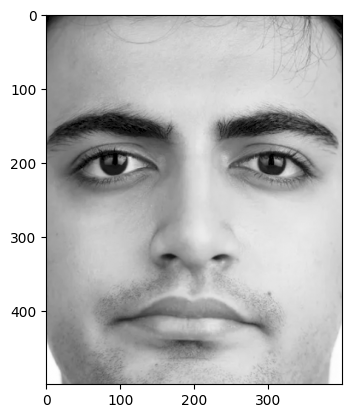

In [3]:
cara = cv.imread("cara.png", cv.IMREAD_GRAYSCALE)
print(cara.shape)
plt.imshow(cara, cmap='gray', vmin=0, vmax=255)
plt.show()

In [4]:
# Crear el kernel filas x columnas.
kernel1 = np.zeros((60, 30), dtype=np.uint8)
kernel1[:, 15:] = 1  # Lado izquierdo de 0's y lado derecho de 1's
kernel1[:, :15] = -1

# Imprimo el kernel
print("Kernel:\n", kernel1)

# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada1 = cv.dilate(cara, kernel1, iterations=1)


OverflowError: Python integer -1 out of bounds for uint8

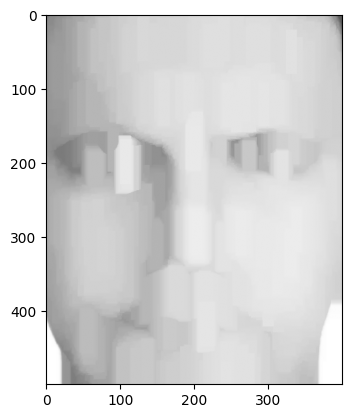

In [9]:
plt.imshow(imagen_dilatada1, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# Crear el kernel filas por columnas
kernel2 = np.zeros((100, 50), dtype=np.uint8)
kernel2[50:, :] = 1  # Se divide el kernel en dos partes iguales. La parte superior de ceros y la parte inferior de unos.

# Imprimo el kernel
print("Kernel:\n", kernel2)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada2 = cv.dilate(cara, kernel2, iterations=1)

Kernel:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


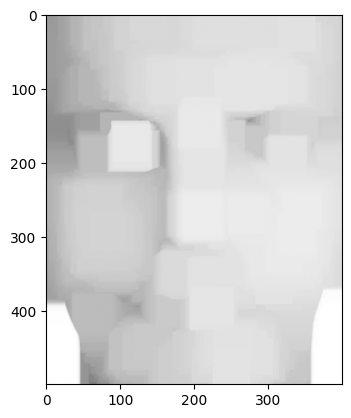

In [7]:
plt.imshow(imagen_dilatada2, cmap='gray', vmin=0, vmax=255)
plt.show()

In [14]:
# Crear el kernel filas por columnas
kernel3 = np.zeros((30, 60), dtype=np.uint8)
# Divimos las columnas en tres partes iguales la primera y la última serán de 1's y la central de 0's
kernel3[:, :20] = 1  
kernel3[:, 40:] = 1

# Imprimo el kernel
print("Kernel:\n", kernel3)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada3 = cv.dilate(cara, kernel3, iterations=1)

Kernel:
 [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


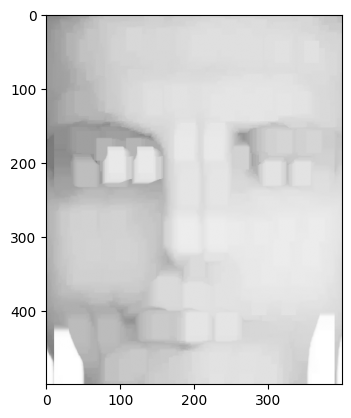

In [15]:
plt.imshow(imagen_dilatada3, cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
# Crear el kernel filas por columnas
kernel4 = np.zeros((60, 30), dtype=np.uint8)
# Divido las filas en dos partes iguales, en el primer grupo de filas la primera mitad de las columnas se pone a 1's la otra mitad a 0's
#       con la otra parte de filas sería al contrario la primera mitad de columnas a 0's y la otra mitad a 1's.
kernel4[:30, :15] = 1  
kernel4[30:, 15:] = 1

# Imprimo el kernel
print("Kernel:\n", kernel4)



# Aplicar dilatación (los 1's "expandirán" los píxeles claros)
imagen_dilatada4 = cv.dilate(cara, kernel4, iterations=1)

Kernel:
 [[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


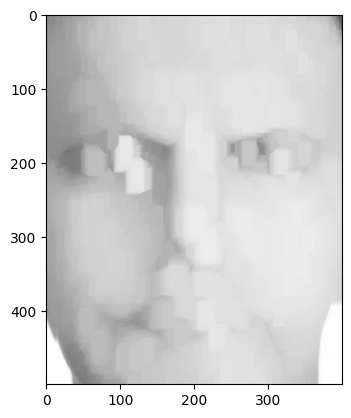

In [17]:
plt.imshow(imagen_dilatada4, cmap='gray', vmin=0, vmax=255)
plt.show()

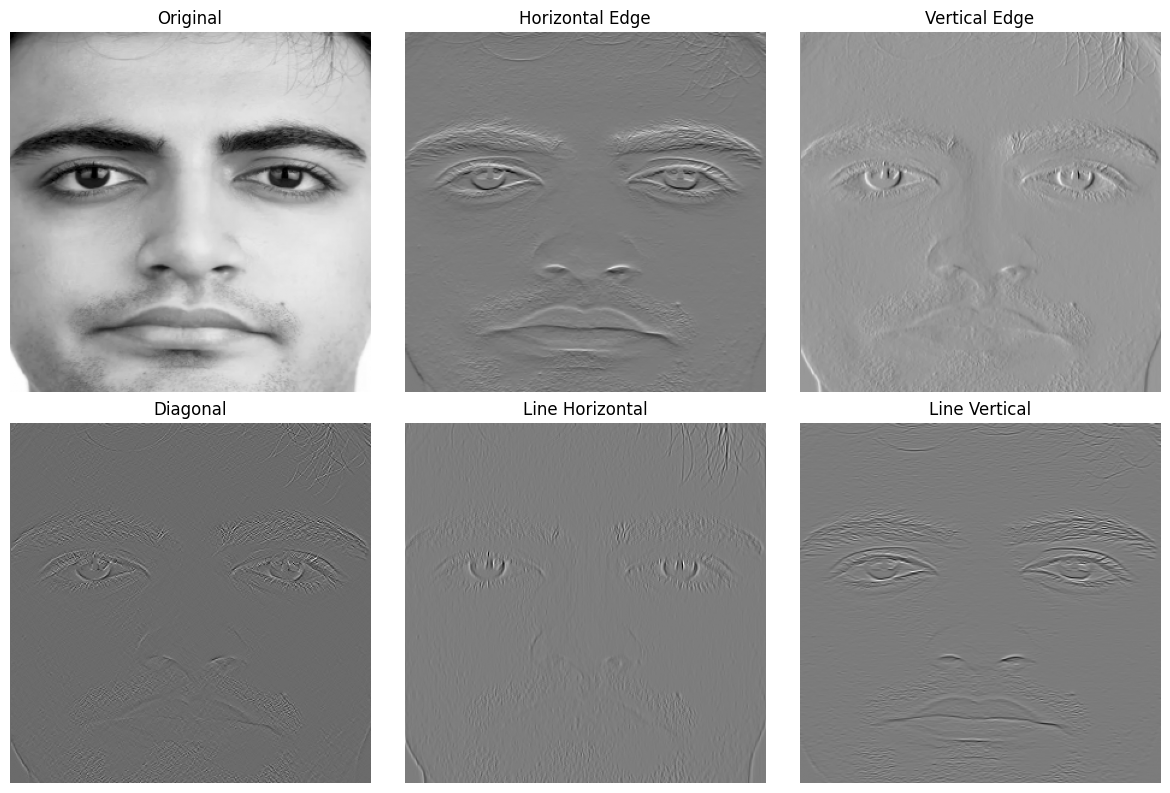

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Cargar imagen y convertir a escala de grises
img = cv2.imread('cara.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (300, 300))  # Redimensionar para verlo mejor

# Definir algunos filtros Haar (simplificados)
haar_filters = {
    'Horizontal Edge': np.array([[-1, -1], [1, 1]]),
    'Vertical Edge': np.array([[-1, 1], [-1, 1]]),
    'Diagonal': np.array([[1, -1], [-1, 1]]),
    'Line Horizontal': np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]]),
    'Line Vertical': np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
}

# Aplicar cada filtro y mostrar resultados
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, (name, kernel) in enumerate(haar_filters.items(), start=2):
    filtered = convolve2d(img, kernel, mode='same', boundary='symm')
    plt.subplot(2, 3, i)
    plt.imshow(filtered, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
print(haar_filters['Horizontal Edge'])

[[-1 -1]
 [ 1  1]]
